---
# Topics on the World Development Indicators
---

This is a jupyter notebook where we do an analysis on the World Development Indicators from the World Bank (https://datacatalog.worldbank.org/dataset/world-development-indicators). It is a dataset containing annual indicators of economic development from hundreds of countries around the world. For this project, we will look just to the European Union. In what follows, then, we separate the countries from the European Union for our analysis. 

In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Importing the Indicators dataset
indicators = pd.read_csv('Indicators.csv')

# Countries of the European Union
eu_countries = ['European Union', 'Austria','Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
                'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
                'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
                'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
                'Sweden', 'United Kingdom']

# Defining the dataset containg only the countries from European Union
eu = indicators[indicators['CountryName'].isin(eu_countries)]

print(eu['CountryName'].unique())
eu.head()


['European Union' 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg'
 'Malta' 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Slovenia' 'Spain'
 'Sweden' 'United Kingdom']


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
790,European Union,EUU,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,38.998777
791,European Union,EUU,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,55.211412
792,European Union,EUU,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,15.248715
793,European Union,EUU,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,39.797238
794,European Union,EUU,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,1960,2.865260


Now we show graphically the evolution of the fertility rate and Gross Domestic Product in the European Union. Firstly, we will use some lines of code to separate and organize the indicators that interest us to graphically display the fertility rate and the Gross Domestic Product in the European Union.

In [2]:
# Separating the indicators and putting them into a list
indicadores = eu[['IndicatorName','IndicatorCode']].drop_duplicates().values
indicadores

array([['Adolescent fertility rate (births per 1,000 women ages 15-19)',
        'SP.ADO.TFRT'],
       ['Age dependency ratio (% of working-age population)',
        'SP.POP.DPND'],
       ['Age dependency ratio, old (% of working-age population)',
        'SP.POP.DPND.OL'],
       ...,
       ['Fish species, threatened', 'EN.FSH.THRD.NO'],
       ['Mammal species, threatened', 'EN.MAM.THRD.NO'],
       ['Plant species (higher), threatened', 'EN.HPT.THRD.NO']],
      dtype=object)

In [38]:
# Reorganizing the indicators to better access Reorganizando os indicadores para melhor acessá-los e transformando em um DataFrame
new_indicators =[]
indicators_code =[]

for ind in indicadores:
    indicador = ind[0]
    code = ind[1].strip()
    if code not in indicators_code:
        # Deleting the caracters ,() from the indicators and converting all the caracters to lower case.
        modified_indicator = re.sub('[,()]',"",indicador).lower()
        # Changing - for "to"
        modified_indicator = re.sub('-'," to ",modified_indicator).lower()
        new_indicators.append([modified_indicator,code])
        indicators_code.append(code)
                
new_indicadores = pd.DataFrame(new_indicators, columns=['IndicatorName','IndicatorCode']).drop_duplicates()
print('We have %s features in this dataset!' % new_indicadores.shape[0])

We have 1284 features in this dataset!


In order to find the correct indicators for our analysis, we first investigate what are the indicators (name and code) that contain the word *fertility* and the initials *GDP* (*Gross Domestic Public*).

In [4]:
indncode = []
for element in new_indicators:
    if ('fertility' in element[0]) or ('GDP' in element[1]):
        indncode.append(element)
indncode

[['adolescent fertility rate births per 1000 women ages 15 to 19',
  'SP.ADO.TFRT'],
 ['fertility rate total births per woman', 'SP.DYN.TFRT.IN'],
 ['gdp at market prices constant 2005 us$', 'NY.GDP.MKTP.KD'],
 ['gdp at market prices current us$', 'NY.GDP.MKTP.CD'],
 ['gdp per capita constant 2005 us$', 'NY.GDP.PCAP.KD'],
 ['gdp per capita current us$', 'NY.GDP.PCAP.CD'],
 ['gdp constant lcu', 'NY.GDP.MKTP.KN'],
 ['gdp current lcu', 'NY.GDP.MKTP.CN'],
 ['gdp deflator base year varies by country', 'NY.GDP.DEFL.ZS'],
 ['gdp per capita constant lcu', 'NY.GDP.PCAP.KN'],
 ['gdp per capita current lcu', 'NY.GDP.PCAP.CN'],
 ['gdp growth annual %', 'NY.GDP.MKTP.KD.ZG'],
 ['gdp per capita growth annual %', 'NY.GDP.PCAP.KD.ZG'],
 ['inflation gdp deflator annual %', 'NY.GDP.DEFL.KD.ZG'],
 ['gross value added at factor cost current lcu', 'NY.GDP.FCST.CN'],
 ['gross value added at factor cost current us$', 'NY.GDP.FCST.CD'],
 ['coal rents % of gdp', 'NY.GDP.COAL.RT.ZS'],
 ['forest rents % of gdp', 

For us to plot a graph of the fertility rate evolution through time, we will use the indicator *fertility rate total births per woman*, with code *SP.DYN.TFRT.IN*. And for the Gross Domestic Public, we will use the indicator *gdp per capita current us$*, with code *NY.GDP.PCAP.CD*.

In [5]:
# Creating two filters for the two indicators
chosen_indicators = ['SP.DYN.TFRT.IN', 'NY.GDP.PCAP.CD']
# Creating the dataframe to work with
dftowork = eu[eu['IndicatorCode'].isin(chosen_indicators)]
print(dftowork.shape)
dftowork.head()

(2701, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
829,European Union,EUU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,2.584090
836,European Union,EUU,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,876.477907
4422,Austria,AUT,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,2.690000
4434,Austria,AUT,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,935.460427
4941,Belgium,BEL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,2.540000


In [6]:
# Importing the plotly library, which allow us to plot iterative graphics
import plotly 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [7]:
# List that contain the countries names and their codes
countries = eu[['CountryName','CountryCode']].drop_duplicates().values

# Function that creates a dataset, "df_stage", containing a filter per indicator and all the countries that have 
# some data from a minimum date and a commum maximum date. 

def stage_prep(indicator):
    
    # creating a dictionary of dataframes
    dfs = {'df_'+str(countries[i][1]): dftowork[(dftowork['CountryCode'] == countries[i][1]) &
                                       (dftowork['IndicatorCode'] == indicator)] for i in range(len(countries))}
    
    min_list = [dfs['df_'+str(countries[i][1])].Year.min() for i in range(len(countries))]
    max_among_all_min_years = max(min_list)
            
    max_list = [dfs['df_'+str(countries[i][1])].Year.max() for i in range(len(countries))]
    min_among_all_max_years = min(max_list)
        
    if((len(set(min_list)) == 1) & (len(set(max_list)) == 1)):
        
        df_stage = dftowork[dftowork['IndicatorCode'] == indicator]
        
        return df_stage
            
    else:
        
        year_and_indicator_filter = ((dftowork['Year'] >= max_among_all_min_years) & 
                                             (dftowork['Year'] <= min_among_all_max_years) &
                                             (dftowork['IndicatorCode'] == indicator))
        df_stage = dftowork[year_and_indicator_filter] 
        return df_stage

In [8]:
# Crating a function to plot the graphics 
def plot_line(df_stages):
    
    # Creating the figure
    figure ={
    'data':[],
    'layout':{}
    }
    # Dictionary of datasets
    df_c = {i: df_stages[df_stages['CountryCode'] == countries[i][1]] for i in range(len(countries))}
    
    # Creating a graphic for each country
    for i in range(len(countries)):
        traces = {i: go.Scatter({
            'x': list(df_c[i]['Year']),
            'y': list(df_c[i]['Value']),
            'connectgaps': True,
            'text': list(df_c[i]['Value']),
            'name': countries[i][0]
        }) }
        
        figure['data'].append(traces[i])
        title = df_stages['IndicatorName'].iloc[0]
        
        figure['layout']['title'] = title
        figure['layout']['xaxis'] = {'title': 'Years'}
        figure['layout']['yaxis'] = {'title': 'Value'}
        figure['layout']['hovermode'] = 'compare'
    
    iplot(figure, validate=False)

#### Graphic that shows the fertility rate evolution through time

First, we plot a graph containing all the countries from the European Union and that makes use of the function that filters for commum dates, the function stage_prep, and by indicator. 

In [9]:
plot_line(stage_prep(chosen_indicators[0]))

Now, we plot a graphic containing only the indicator "European Union".

In [10]:
onlyeu = dftowork[(dftowork['IndicatorCode'] == chosen_indicators[0]) & (dftowork['CountryCode'] == 'EUU')]
plot_line(onlyeu)

#### Graphic that shows the GDP evolution through time

Analogously, we first plot a graph containing all the countries from the European Union and that makes use of the function that filters for commum dates, the function stage_prep, and by indicator.

In [11]:
plot_line(stage_prep(chosen_indicators[1]))

Now, we plot a graph were we do not make use of the function that filters for commum dates, the function stage_prep, and by indicator.

In [12]:
nofilter = dftowork[(dftowork['IndicatorCode'] == chosen_indicators[1])]
plot_line(nofilter)

Also, a graph containing only the indicator "European Union."

In [13]:
justeu = dftowork[(dftowork['IndicatorCode'] == chosen_indicators[1]) & (dftowork['CountryCode'] == 'EUU')]
plot_line(justeu)

---
### Correlation between Fertility Rate and GDP
---

Analyzing the graphs, we can observe a correlation between the fertility rate and the Gross Domestic Product in the European Union, because simultaneously with the decrease of the fertility rate we have a GDP growth *per capita*. This suggests a correlation between the variables. In addition, as shown by the correlation indicators plotted below with the *EUU* indicator of the European Union, we can affirm that, in fact, the correlation exists.

In [14]:
# Codes
gdp = dftowork[(dftowork['IndicatorCode'] == chosen_indicators[1]) & (dftowork['CountryCode'] == 'EUU')]['Value']
fert = dftowork[(dftowork['IndicatorCode'] == chosen_indicators[0]) & (dftowork['CountryCode'] == 'EUU')]['Value']
corre = pd.DataFrame()
corre['GDP'] = gdp.reset_index(drop=True)
corre['Fertility'] = fert.reset_index(drop=True)
cor = corre.corr()
cor

,GDP,Fertility
GDP,1.000000,-0.767273
Fertility,-0.767273,1.000000


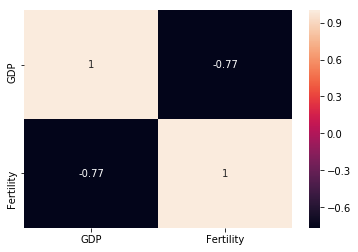

In [15]:
sns.heatmap(cor, annot=True)

### Note on correlation vs causality

Note that correlation does not imply causality. Variables may be correlated, but this does not mean one cause the other or vice versa. From the logical-mathematical point of view, the relation of causality or implication, $A \rightarrow B$ ($A$ implies $B$), is a not necessarily symmetric relation, i.e., if $A$ implies $B$, not necessarily $B$ implies $A$ (example: if $x$ and $y$ are even natural numbers, then $xy$ is even - the reciprocal is not true, since $6 = 3\times2$ is an even number but $3$ is not an even number). However, the correlation is a symmetrical relationship. The variable $A$ is related to the variable $B$ if, and only if, the variable $B$ is related to the variable $A$. So, in our analysis, we can not say that *GDP growth led to a reduction in the fertility rate in the European Union* because there is a correlation between the fertility rate and GDP growth.

To make it even more explicit, we can say that the number of shark attacks on Northeastern Brazilian beaches (hot water) is correlated with the consumption of ice creams on the same beaches, however, we can not in any way say that one caused the other or vice versa.

### Least squares

In what follows, we will use the Least squares method using the python library [Stats mod](https://www.statsmodels.org/stable/index.html) for _Household final consumption expenditure (constant 2005 US\$)_ and _GDP at market prices (constant 2005 US$)_. 

For the indicators *Household final consumption expenditure (constant $2005$ US\$)* and *GDP at market prices (constant $2005$ US\$)* we have, respectively, the codes *NE.CON.PETC.KD and NY.GDP.MKTP.KD* 

Hence, we separate a dataset for work with these two indicators.

In [16]:
key_indicators = ['NE.CON.PETC.KD', 'NY.GDP.MKTP.KD']
data = eu[eu['IndicatorCode'].isin(key_indicators)]
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
833,European Union,EUU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,3.684449e+12
4428,Austria,AUT,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,7.930793e+10
4947,Belgium,BEL,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,1.034777e+11
8371,Denmark,DNK,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,8.001632e+10
9460,Finland,FIN,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,4.641667e+10


In [17]:
hhdata = data[data['IndicatorCode'] == key_indicators[0]].reset_index(drop=True)
gdpdata = data[data['IndicatorCode'] == key_indicators[1]].reset_index(drop=True)
gdpdata.shape, hhdata.shape

((1178, 6), (1035, 6))

In [18]:
# Correcting the dates so that the variables have the same size
def correctyears(countrycode):
    
    # creating a list of years for the country comparing with the variables
    hhyears = list(set(hhdata[(hhdata['CountryCode'] == countrycode) &
                                       (hhdata['IndicatorCode'] == key_indicators[0])]['Year']))
    gdpyears = list(set(gdpdata[(gdpdata['CountryCode'] == countrycode) &
                                       (gdpdata['IndicatorCode'] == key_indicators[1])]['Year']))
    
    years = list(set(hhyears) & set(gdpyears))
    
    return years
   

In [19]:
# Defining a dictionary to colect the two variables for each country of the Eropean Union
variables = {}

for i in range(len(countries)):
    years = correctyears(countries[i][1])
    
    variables['C_'+str(countries[i][1])] = [hhdata[(hhdata['CountryCode'] == countries[i][1]) & 
                                                   (hhdata['Year'] >= min(years)) & 
                                             (hhdata['Year'] <= max(years))]['Value'].reset_index(drop=True)]
    variables['Y_'+str(countries[i][1])] = [gdpdata[(gdpdata['CountryCode'] == countries[i][1]) & 
                                                   (gdpdata['Year'] >= min(years)) & 
                                             (gdpdata['Year'] <= max(years))]['Value'].reset_index(drop=True)]

<function matplotlib.pyplot.show(*args, **kw)>

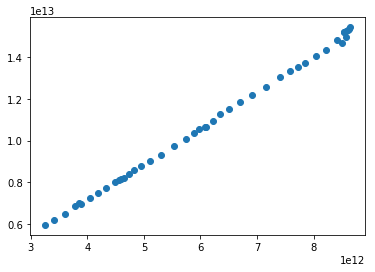

In [20]:
# A graphich analysis of the linear beahaviour between the variables with indicator "EUU"
plt.scatter(variables['C_EUU'], variables['Y_EUU'])
plt.show

In [21]:
# Now, for each country we implement a linear regression using statsmodels.api

import statsmodels.api as sm

def OLSmodel(C,Y):

    y = sm.add_constant(Y)
    model = sm.OLS(C,y)
    results = model.fit()
    
    return results


In [22]:
# Putting the results in a dictionary
results = {'model_'+str(countries[i][1]): OLSmodel(variables['C_'+str(countries[i][1])], 
                                                   variables['Y_'+str(countries[i][1])]) for i in range(len(countries))}

In [23]:
# As an example, we present the parameters from Belgium
results['model_BEL'].params

array([[0.00327014, 0.0034472 , 0.00366621, ..., 0.00831996, 0.00839127,
        0.00841337],
       [0.00340049, 0.0035846 , 0.00381234, ..., 0.00865158, 0.00872573,
        0.00874871],
       [0.00358056, 0.00377442, 0.00401422, ..., 0.00910973, 0.00918781,
        0.00921201],
       ...,
       [0.00830444, 0.00875407, 0.00931024, ..., 0.02112831, 0.02130941,
        0.02136552],
       [0.00830582, 0.00875552, 0.00931178, ..., 0.0211318 , 0.02131294,
        0.02136906],
       [0.00841781, 0.00887358, 0.00943734, ..., 0.02141674, 0.02160031,
        0.02165719]])

### A machine learning model to explain fertility rate

Now, among all the variables, we select only five variables to create a model to explain fertility rate. After a variable analysis and some reading of scientific papers, like [this one](http://paa2013.princeton.edu/papers/131165), we decided to create a model to explain the mortality rate by using the following features:  

- *mortality rate adult female per 1000 female adults*, with code *SP.DYN.AMRT.FE*
- *mortality rate infant per 1000 live births*, with code *SP.DYN.IMRT.IN*;
- *number of maternal deaths*, with code *SH.MMR.DTHS*;
- *fertility rate total births per woman*, with code *SP.DYN.TFRT.IN*;
- *GDP per capita (current US\$)*, with code *NY.GDP.PCAP.CD*

Also, to create this mode we will use only the code *EUU* from European Union.


In [24]:
# Dataset to work with
codigos = ['SP.DYN.AMRT.FE', 'SH.MMR.DTHS', 'SP.DYN.TFRT.IN', 'NY.GDP.PCAP.CD', 'SP.DYN.IMRT.IN']
lastdata = eu[(eu['IndicatorCode'].isin(codigos)) & (eu['CountryCode']== 'EUU')].reset_index(drop=True)
lastdata.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,European Union,EUU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,2.584090
1,European Union,EUU,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,876.477907
2,European Union,EUU,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,114.967322
3,European Union,EUU,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1960,38.252879
4,European Union,EUU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1961,2.595362


In [25]:
# Creating the dataset
dicfeat = {}
for indicator in codigos:
    dicfeat[indicator] = lastdata[lastdata['IndicatorCode'] == indicator]['Value'].reset_index(drop=True)
lastdf= pd.DataFrame(dicfeat)
lastdf.head()

,SP.DYN.AMRT.FE,SH.MMR.DTHS,SP.DYN.TFRT.IN,NY.GDP.PCAP.CD,SP.DYN.IMRT.IN
0,114.967322,1100.0,2.584090,876.477907,38.252879
1,111.657112,970.0,2.595362,946.144153,36.172719
2,112.326256,900.0,2.590916,1024.503361,34.338029
3,111.399508,840.0,2.624209,1118.634765,32.832767
4,107.536778,790.0,2.654782,1228.940113,31.241302


In [26]:
# Renaming the columns
columns = ['GDP_per_capita', 'Maternal_deaths', 'Mortality_rate_female', 'Mortality_rate_infant', 'fertility_rate']
lastdf.columns = columns

In [27]:
lastdf.head(n=100)

,GDP_per_capita,Maternal_deaths,Mortality_rate_female,Mortality_rate_infant,fertility_rate
0,114.967322,1100.0,2.584090,876.477907,38.252879
1,111.657112,970.0,2.595362,946.144153,36.172719
2,112.326256,900.0,2.590916,1024.503361,34.338029
3,111.399508,840.0,2.624209,1118.634765,32.832767
4,107.536778,790.0,2.654782,1228.940113,31.241302
5,107.081915,750.0,2.597416,1327.323350,29.790846
6,105.705617,710.0,2.557162,1427.916239,28.554138
7,104.286989,660.0,2.596991,1523.321832,27.461101
8,104.114608,620.0,2.536515,1572.771468,28.253983
9,106.262297,590.0,2.451709,1716.385694,27.280888


In [28]:
# Droping the last two lines of the dataframe and dealing with NaN's

lastdf = lastdf.drop([lastdf.index[54], lastdf.index[55]])
lastdf.fillna(lastdf.mean(), inplace=True)

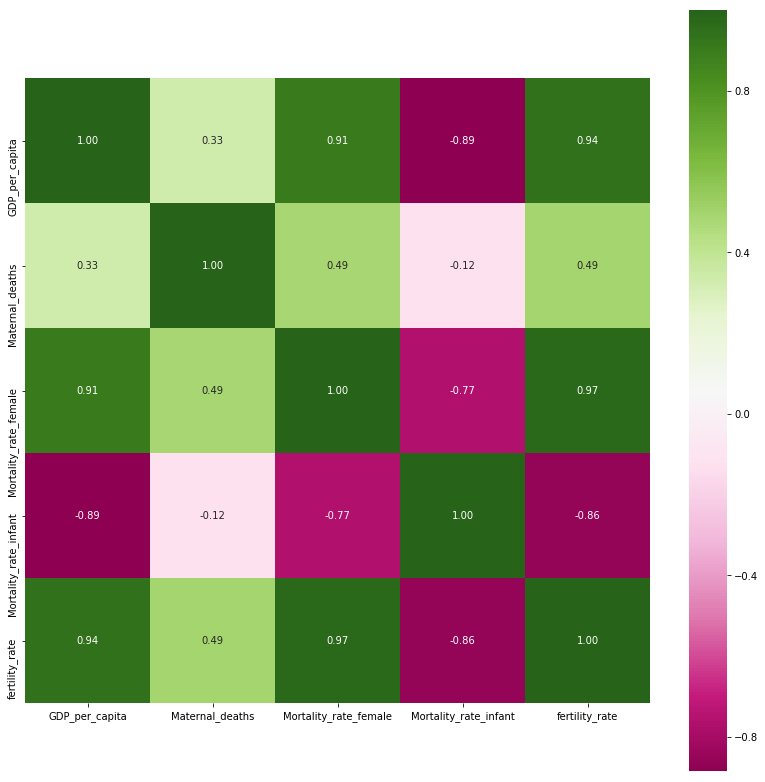

In [29]:
# Analysing the correlation between the variables
corr_mean = lastdf.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_mean, cbar=True, square=True, annot=True, fmt='.2f', cmap='PiYG')

It seems that there is a good correlation between our target variable, fertility_rate, and the other ones.

In what follows, we check the linearity between the target variable and the other variables. 

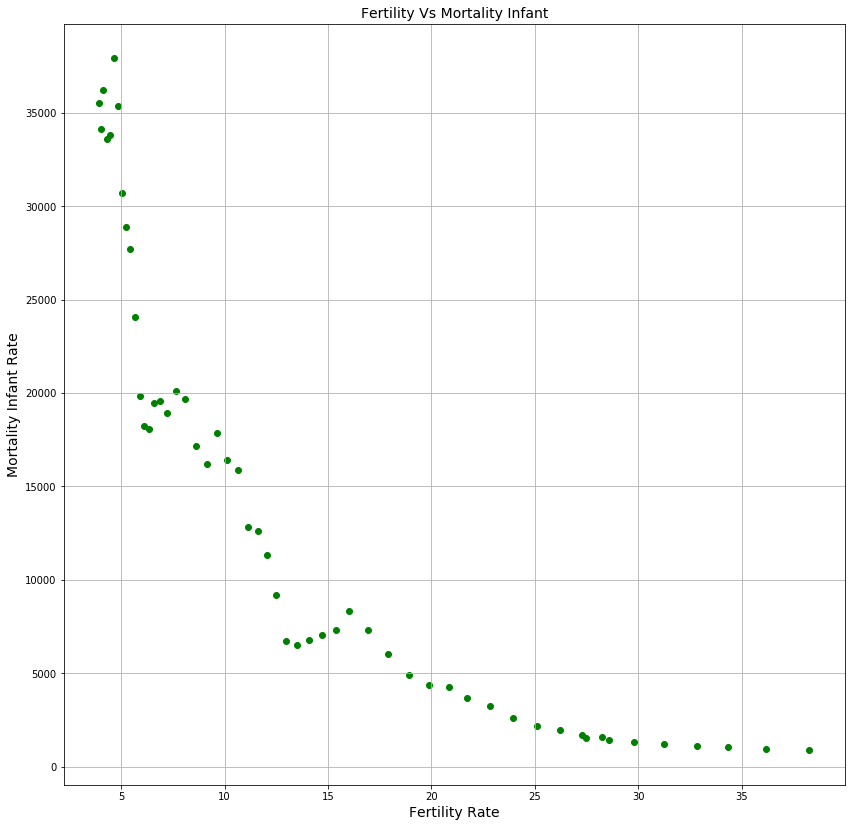

In [30]:
# Fertility vs Mortality_rate_infant
plt.figure(figsize=(14, 14))
plt.scatter(lastdf['fertility_rate'], lastdf['Mortality_rate_infant'], color='green')
plt.title('Fertility Vs Mortality Infant', fontsize=14)
plt.xlabel('Fertility Rate', fontsize=14)
plt.ylabel('Mortality Infant Rate', fontsize=14)
plt.grid(True)
plt.show()

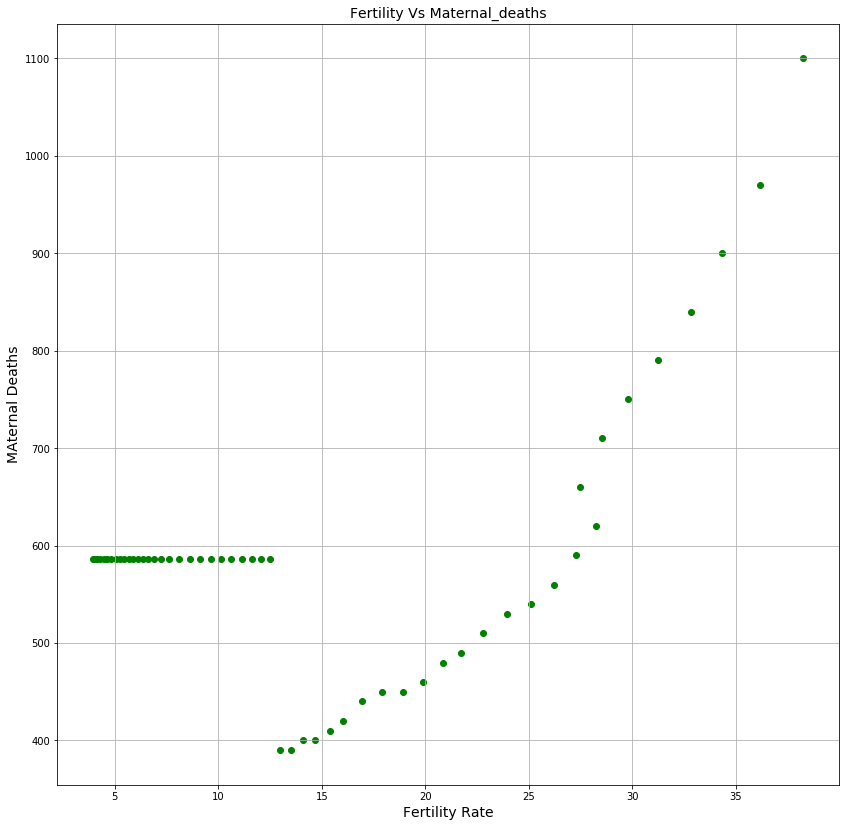

In [31]:
# Fertility vs Maternal Deaths
plt.figure(figsize=(14, 14))
plt.scatter(lastdf['fertility_rate'], lastdf['Maternal_deaths'], color='green')
plt.title('Fertility Vs Maternal_deaths', fontsize=14)
plt.xlabel('Fertility Rate', fontsize=14)
plt.ylabel('MAternal Deaths', fontsize=14)
plt.grid(True)
plt.show()

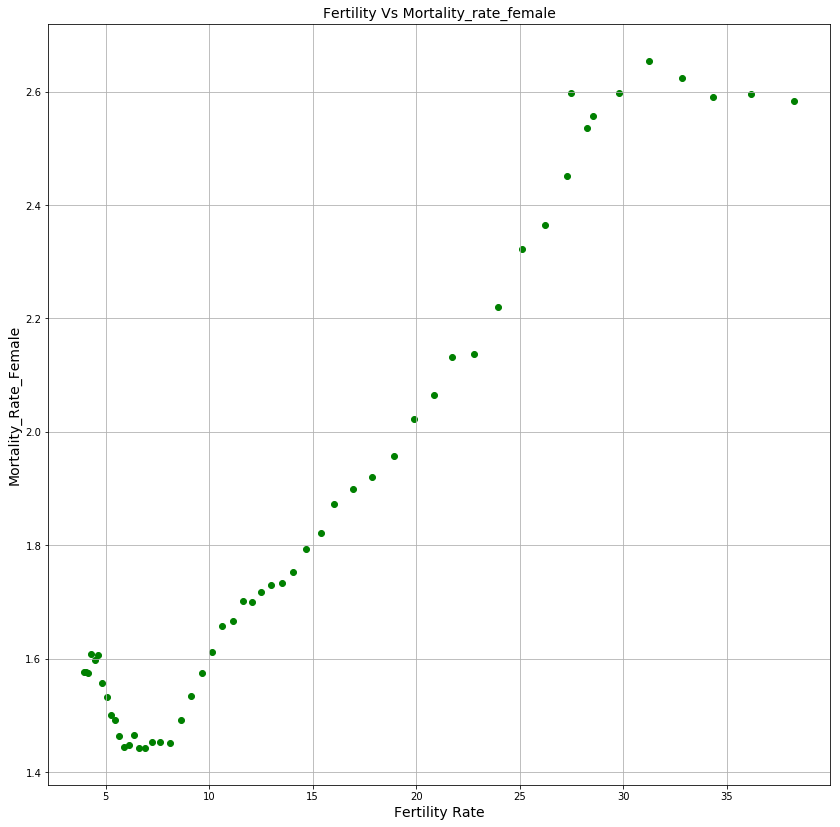

In [32]:
# Fertility vs Mortality_rate_female
plt.figure(figsize=(14, 14))
plt.scatter(lastdf['fertility_rate'], lastdf['Mortality_rate_female'], color='green')
plt.title('Fertility Vs Mortality_rate_female', fontsize=14)
plt.xlabel('Fertility Rate', fontsize=14)
plt.ylabel('Mortality_Rate_Female', fontsize=14)
plt.grid(True)
plt.show()

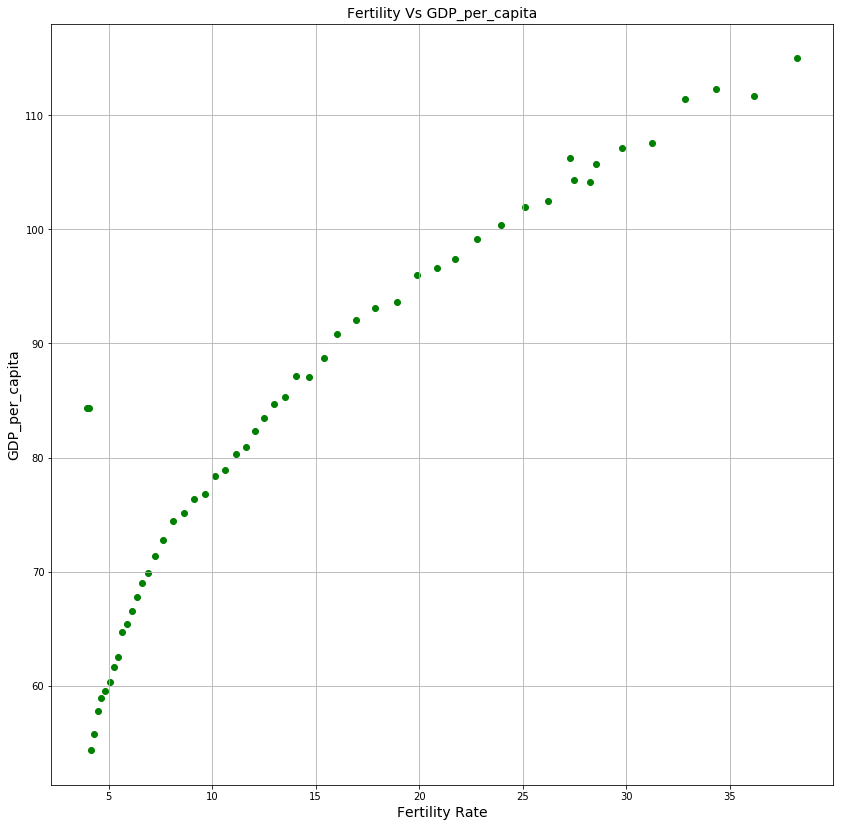

In [33]:
# Fertility vs GDP_per_capita
plt.figure(figsize=(14, 14))
plt.scatter(lastdf['fertility_rate'], lastdf['GDP_per_capita'], color='green')
plt.title('Fertility Vs GDP_per_capita', fontsize=14)
plt.xlabel('Fertility Rate', fontsize=14)
plt.ylabel('GDP_per_capita', fontsize=14)
plt.grid(True)
plt.show()

### Creating a model

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Isolating the target variable
X = lastdf.drop('fertility_rate', axis=1)
y = lastdf.fertility_rate

In [35]:
# Cross Validation and the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [36]:
# R^2 score
print('Variance score: {}'.format(lm.score(X_test,y_test)))

Variance score: 0.9885468524971056


We note that the $R^2$ score of our model is good. This means that the variables we have chosen to predict the fertility rate have a good predictive power.